In [39]:
import warnings
warnings.simplefilter('ignore')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Table of Contents
>## 1. Scaling
## 2. Normalization
## 3. Encoding
* 3.1. Encoding
* 3.2. One-Hot-Encoder
* 3.3. Imputer
* 3.4. Binarizer
* 3.5. Polynomial Features
* 3.6. Function Transformer
* 3.7. Label Encoder
* 3.8. Label Binarizer

## 1. Scaling
* Apply linear transformation $\rightarrow$ average = `0`, variance=`1`
* Goal 1: prevent overflow OR underflow
* Gold 2: reduce condition number $\rightarrow$ faster & more stable optimization

>* **Scaling with `Scikit-Learn`**
  * `scale(X)`: Standard Scaling
  * `robust_scale(X)`: removes the median and scales the data according to the quantile range / robust to outliers
  * `minmax_scale(X)`: Max=1 / Min=0
  * `maxabs_scale(X)`: Maxabs=1 / Minabs=0

In [5]:
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale

x = (np.arange(9, dtype=np.float) - 3).reshape(-1, 1)
x = np.vstack([x, [20]])  # insert outlier
df = pd.DataFrame(np.hstack([x, scale(x), robust_scale(x), minmax_scale(x), maxabs_scale(x)]), 
                  columns=["x", "scale(x)", "robust_scale(x)", "minmax_scale(x)", "maxabs_scale(x)"])
df

,x,scale(x),robust_scale(x),minmax_scale(x),maxabs_scale(x)
0,-3.0,-0.950995,-1.000000,0.000000,-0.15
1,-2.0,-0.789809,-0.777778,0.043478,-0.10
2,-1.0,-0.628624,-0.555556,0.086957,-0.05
3,0.0,-0.467438,-0.333333,0.130435,0.00
4,1.0,-0.306253,-0.111111,0.173913,0.05
5,2.0,-0.145067,0.111111,0.217391,0.10
6,3.0,0.016119,0.333333,0.260870,0.15
7,4.0,0.177304,0.555556,0.304348,0.20
8,5.0,0.338490,0.777778,0.347826,0.25
9,20.0,2.756273,4.111111,1.000000,1.00


In [7]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data
data2 = scale(iris.data)

print("old mean:", np.mean(data1, axis=0))
print("old std: ", np.std(data1, axis=0))
print("new mean:", np.mean(data2, axis=0))
print("new std: ", np.std(data2, axis=0))

old mean: [5.84333333 3.054      3.75866667 1.19866667]
old std:  [0.82530129 0.43214658 1.75852918 0.76061262]
new mean: [-1.69031455e-15 -1.63702385e-15 -1.48251781e-15 -1.62314606e-15]
new std:  [1. 1. 1. 1.]


### Using `StandardScaler` Class for Pipeline
* **How to**
  1. Generate Class object
  2. Use `fit()` method & training data to obtain transformation coefficients
  3. Use `transform()` method
  4. OR Use `fit_transform()` method

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

(1.974000985027335, 1.0)

## 2. Normalization
* Scale input vectors individually to unit norm (vector length)

In [10]:
from sklearn.preprocessing import normalize

x = np.vstack([np.arange(5, dtype=float) - 20, np.arange(5, dtype=float) - 2]).T
y1 = scale(x)
y2 = normalize(x)

print("original x:\n", x)
print("scale:\n", y1)
print("norms (scale)\n", np.linalg.norm(y1, axis=1))
print("normlize:\n", y2)
print("norms (normalize)\n", np.linalg.norm(y2, axis=1))

original x:
 [[-20.  -2.]
 [-19.  -1.]
 [-18.   0.]
 [-17.   1.]
 [-16.   2.]]
scale:
 [[-1.41421356 -1.41421356]
 [-0.70710678 -0.70710678]
 [ 0.          0.        ]
 [ 0.70710678  0.70710678]
 [ 1.41421356  1.41421356]]
norms (scale)
 [2. 1. 0. 1. 2.]
normlize:
 [[-0.99503719 -0.09950372]
 [-0.99861783 -0.05255883]
 [-1.          0.        ]
 [-0.99827437  0.05872202]
 [-0.99227788  0.12403473]]
norms (normalize)
 [1. 1. 1. 1. 1.]


In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

data1 = iris.data[:,:2]
data3 = normalize(data1)

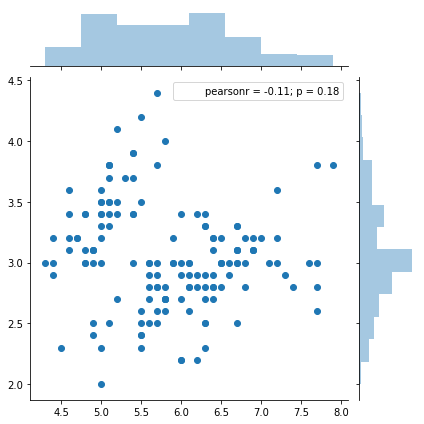

In [12]:
sns.jointplot(data1[:,0], data1[:,1])
plt.show()

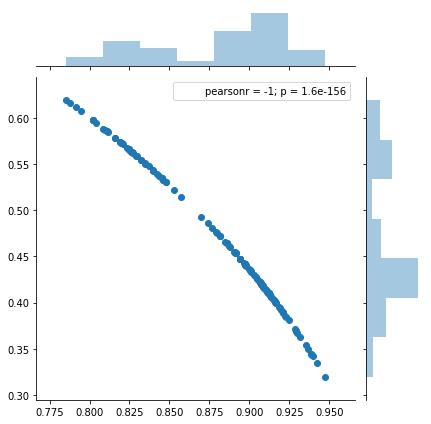

In [13]:
sns.jointplot(data3[:,0], data3[:,1])
plt.show()

## 3. Encoding
* Categorical OR Text data $\rightarrow$ vectors

### 3.1. One-Hot-Encoder
* Encode categorical integer features using a one-hot aka one-of-K scheme
* This encoding is needed for feeding categorical data to many scikit-learn estimators, notably linear models and SVMs with the standard kernels
* **Attributes of the fit() method**
  * `n_values_` : Maximum number of values per feature
  * `feature_indices_` : Indices to feature ranges
  * `active_features_` : Maximum number of values per feature

### OHE for Scalars

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [17]:
X = np.array([[0],[1],[2]])
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

In [20]:
ohe.transform(X).toarray()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### OHE for Vectors

In [21]:
X = np.array([[0, 0, 4], [1, 1, 0], [0, 2, 1], [1, 0, 2]]) 
ohe.fit(X)
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([2, 3, 5]), array([ 0,  2,  5, 10]), array([0, 1, 2, 3, 4, 5, 6, 7, 9]))

In [22]:
ohe.transform(X).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [16]:
ohe = OneHotEncoder(categorical_features=[False, True, False])
ohe.fit_transform(X).toarray()

array([[1., 0., 0., 0., 4.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 2.]])

In [17]:
ohe.n_values_, ohe.feature_indices_, ohe.active_features_

(array([3]), array([0, 3]), array([0, 1, 2]))

### 3.2. Imputer
* `missing_values`
* `strategy` : `mean`(default), `median`, `most_frequent`

In [23]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit_transform([[1, 2], [np.nan, 3], [7, 6]])

array([[1., 2.],
       [4., 3.],
       [7., 6.]])

### 3.3. Binarizer
* Binarize data according to a threshold (default=`0`)

In [24]:
from sklearn.preprocessing import Binarizer
X = [[ 1., -1.,  2.],
     [ 2.,  0.,  0.],
     [ 0.,  1., -1.]]
binarizer = Binarizer().fit(X) 
binarizer.transform(X)

array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [25]:
binarizer = Binarizer(threshold=1.1)
binarizer.transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

### 3.4. PolynomialFeatures
* `PolynomialFeatures(n): ` $ x  \rightarrow  [1, x, x^2, x^3, \cdots x^n] $
* Input is 2D: $\;$ $ [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1^2, x_1x_2, x_2^2] $
* **Parameters:**
  * `degree`
  * `interaction_only`: if True, $ [x_1, x_2] \;\; \rightarrow \;\; [ 1, x_1, x_2, x_1x_2] $
  * `include_bias`

In [26]:
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [27]:
poly = PolynomialFeatures(2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [28]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

### 3.5. FunctionTransformer
* Transform `x` with an arbitrary function
* $ x \;\; \rightarrow \;\; [ f_1(x),  f_2(x),  f_3(x),  \cdots ] $

In [30]:
from sklearn.preprocessing import FunctionTransformer

def kernel(X):
    x0 = X[:, :1]
    x1 = X[:, 1:2]
    x2 = X[:, 2:3]
    X_new = np.hstack([x0, 2 * x1, x2 ** 2, np.log(x1)])
    return X_new

In [31]:
X = np.arange(12).reshape(4, 3)
X

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11]])

In [32]:
kernel(X)

array([[  0.        ,   2.        ,   4.        ,   0.        ],
       [  3.        ,   8.        ,  25.        ,   1.38629436],
       [  6.        ,  14.        ,  64.        ,   1.94591015],
       [  9.        ,  20.        , 121.        ,   2.30258509]])

In [34]:
FunctionTransformer(kernel).fit_transform(X)

array([[  0.        ,   2.        ,   4.        ,   0.        ],
       [  3.        ,   8.        ,  25.        ,   1.38629436],
       [  6.        ,  14.        ,  64.        ,   1.94591015],
       [  9.        ,  20.        , 121.        ,   2.30258509]])

### 3.6. Label Encoder
* Encode labels with value between 0 and n_classes-1
* `classes_` attribute: Holds the label for each class
* `inverse_transform` method: inverse transformation

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
le.fit(y)
le.classes_

array(['A', 'B', 'C'], dtype='<U1')

In [36]:
y2 = le.transform(y) 
y2

array([0, 1, 0, 0, 1, 2, 2, 0, 2, 1])

In [40]:
le.inverse_transform(y2)

array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'], dtype='<U1')

### 3.7. Label Binarizer
* Binarize labels in a one-vs-all fashion

In [41]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y = ['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B']
lb.fit(y)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [42]:
lb.classes_

array(['A', 'B', 'C'], dtype='<U1')

In [43]:
y2 = lb.transform(y)
y2

array([[1, 0, 0],
       [0, 1, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [44]:
lb.inverse_transform(y2)

array(['A', 'B', 'A', 'A', 'B', 'C', 'C', 'A', 'C', 'B'], dtype='<U1')